In [1]:
import os

import pandas as pd
import re

import numpy as np

import random
import ast

import Neuron_analysis as na

import plotly
import plotly.offline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



In [2]:
results_dir= 'D:/Complete_points/'

In [3]:
files= os.listdir(results_dir)

## Plots all downsampled points into same space ##

In [4]:
axons=[os.path.join(results_dir,i) for i in files if '_axons.csv' in i]

In [5]:
data_pd=pd.read_csv(axons[0])
data_pd.loc[100:105]

IndexError: list index out of range

In [8]:
fig=go.Figure()

for count,names in enumerate(axons):
    data_pd=pd.read_csv(names)
    name= re.search('\D{2}[0-9]{3}', names)[0]
    
    data_pd['name']= [na.give_me_name(i) for i in data_pd['atlas_ID']]
    data_pd['ML']= [na.stereotaxis(i,ml=1) for i in data_pd['x']]
    data_pd['AP']= [na.stereotaxis(i,ml=0) for i in data_pd['z']]
    data_pd['DV']= [i*25/1000 for i in data_pd['y']]
    
    fig.add_trace(go.Scatter3d( 
        x=data_pd['ML'],
        y=data_pd['DV'],
        z=data_pd['AP'],
        
        mode='markers',
        name=name,
        marker=dict(
            size=1,
            color=count,
            opacity=0.5
        ),
        
        text=data_pd['name'],
        hovertemplate= '%{text}<br> ML: %{x} mm <br> AP: %{z} mm'
        
    ))

camera = dict(
        eye=dict(x=0, y=-1, z=0)
    )

    #Need to change the axis title depending on the direction and orientation of the origional image (ie, imaging started from cerebellum vs. imaging started from olfactorybulb)
fig.update_layout(scene_camera=camera, 
                      scene=dict(
                        xaxis_title='Medial-lateral',
                        yaxis_title='Dorsal-ventral',
                        zaxis_title='Anterior-posterior'))
plot(fig,filename=results_dir+'allprojection3d.html')

'D:/Complete_points/allprojection3d.html'

## Plots the individual original points with associated ID ##

In [77]:
ori_points=[os.path.join(results_dir,i) for i in files if 'oripoints' in i]
ori_points

['D:/Complete_points/GF243D_oripoints_withID.csv',
 'D:/Complete_points/GF243_oripoints_withID.csv']

In [79]:
axons=pd.read_csv(ori_points[1])
#axons['name']= [na.give_me_name(i) for i in axons['atlasID']]
dendrites=pd.read_csv(ori_points[0])
#dendrites['name']= [na.give_me_name(i) for i in dendrites['atlasID']]
mousename=na.find_mousename(ori_points[1])

In [81]:
axons

,x,y,z,atlasID
0,5275.74,2194.85,3899.45,886
1,5275.51,2195.14,3898.52,886
2,5275.29,2195.44,3897.59,886
3,5275.06,2195.74,3896.66,886
4,5274.84,2196.03,3895.73,886
...,...,...,...,...
60055,5177.00,2768.27,4775.83,847
60056,5613.60,2982.40,4725.00,847
60057,5613.50,2982.40,4724.01,847
60058,5613.39,2982.40,4723.01,847


In [138]:
def make_scatter(axons, dendrites, mousename):
        
    fig=go.Figure()
    fig.add_trace(go.Scatter3d( 
        x=axons[::3]['x'],
        y=axons[::3]['y'],
        z=axons[::3]['z'],
        mode='markers',
        name='Axons',
        marker=dict(
            size=1,
            color='blue',
            opacity=0.5
        ),
        #hovertext= axons[::3]['name'],
        hovertext= axons['atlasID'],
        hoverinfo='text'
    ))
    
    fig.add_trace(go.Scatter3d(
        x=dendrites['x'],
        y=dendrites['y'],
        z=dendrites['z'],
        mode='markers',
        name='Dendrites',
        marker=dict(
            size=2,
            color='red',
            opacity=0.5),
        #hovertext= dendrites['name'],
        hovertext=dendrites['atlasID'],
        hoverinfo='text'
    ))

#Here we want horizontal view with dorsal surface toward us
#first we set a xz view for coronal section this is done by setting x and z as 0 in eye
# then, for y we want the smaller values to point toward us (because in our original coronal images dorsal surface is pointed up)
    camera = dict(
            eye=dict(x=0, y=0, z=2.5))
    #Need to change the axis title depending on the direction and orientation of the origional image (ie, imaging started from cerebellum vs. imaging started from olfactorybulb)
    fig.update_layout(scene_camera=camera, 
                      scene=dict(
                        xaxis_title='Medial-lateral',
                        yaxis_title='Dorsal-ventral',
                        zaxis_title='Anterior-posterior'))
    #fig.write_image(f"D:/2PT electroporation time/{mousename}.svg")
    plot(fig,filename='D:/2PT electroporation time/'+ mousename+'/3Dplot.html')
    

In [139]:
make_scatter(axons,dendrites,mousename)

## analysis of viral project injection site! ##

In [2]:
data=pd.read_excel(r'D:\viral_injectionsite\results.xlsx',index_col=0)

In [3]:
data

,Data_name,Total_voxels,Centroid_location_1,Centroid_location_2,Centroid_location_3,Centroid_id,Voxel_id
0,AL207_647,6480,121,276,60,1070,"[{9: 23, 1038: 1543, 1047: 14, 1070: 3873, 111..."
1,AL208_647,1691,137,274,51,1111,"[{9: 182, 625: 138, 945: 4, 1111: 1137, 182305..."
2,AL209_647,4218,109,270,69,1070,"[{1038: 75, 1047: 11, 1070: 4132}]"
3,AL210_647,1855,122,287,52,1070,"[{1047: 10, 1070: 1134, 1111: 159, 312782558: ..."
4,AL211_647,1584,106,276,66,1070,"[{1047: 94, 1070: 1490}]"
...,...,...,...,...,...,...,...
56,AL330_647,4020,79,272,109,862,"[{862: 2818, 1038: 681, 1070: 72, 1090: 449}]"
57,AL331_561,2194,56,274,79,873,"[{0: 37, 201: 191, 806: 629, 873: 881, 981: 456}]"
58,AL332_561,1143,54,287,77,873,"[{0: 52, 527: 17, 806: 293, 873: 781}]"
59,AL333_561,2061,50,277,92,806,"[{0: 22, 806: 1128, 873: 903, 1035: 8}]"


In [5]:
data['Genotype']= ['Sim1Cre', 'Sim1Cre', 'Sim1Cre', 'Tlx3Cre', 'Rbp4Cre', 'Tlx3Cre', 'Rbp4Cre', 'Rbp4Cre', 'Rasgrf2dCre', 'Rasgrf2dCre',
                   'Rasgrf2dCre', 'Rasgrf2dCre', 'Rbp4Cre', 'Rbp4Cre', 'Sim1Cre', 'Ntsr1Cre', 'Ntsr1Cre', 'Ntsr1Cre', 'Tlx3Cre', 'Rbp4Cre', 
                   'Tlx3Cre', 'Sim1Cre', 'Ntsr1Cre', 'Ntsr1Cre', 'Ntsr1Cre', 'Sim1Cre', 'Sim1Cre', 'Rbp4Cre', 'Rbp4Cre', 'Scnn1aCre',
                  'Scnn1aCre','Scnn1aCre','Scnn1aCre','Scnn1aCre','Scnn1aCre','Scnn1aCre','Scnn1aCre','Rasgrf2dCre','Rasgrf2dCre','Rbp4Cre',
                   'Ntsr1Cre', 'Ntsr1Cre', 'Tlx3Cre', 'Tlx3Cre', 'Rbp4Cre', 'Tlx3Cre', 'Tlx3Cre', 'Sim1Cre', 'Sim1Cre','Scnn1aCre',
                   'Scnn1aCre', 'Rbp4Cre', 'Rbp4Cre', 'Rbp4Cre', 'Rbp4Cre', 'Ntsr1Cre', 'Ntsr1Cre', 'Rasgrf2dCre', 'Rasgrf2dCre', 'Rasgrf2dCre', 'Rasgrf2dCre']

In [6]:
data

,Data_name,Total_voxels,Centroid_location_1,Centroid_location_2,Centroid_location_3,Centroid_id,Voxel_id,Genotype
0,AL207_647,6480,121,276,60,1070,"[{9: 23, 1038: 1543, 1047: 14, 1070: 3873, 111...",Sim1Cre
1,AL208_647,1691,137,274,51,1111,"[{9: 182, 625: 138, 945: 4, 1111: 1137, 182305...",Sim1Cre
2,AL209_647,4218,109,270,69,1070,"[{1038: 75, 1047: 11, 1070: 4132}]",Sim1Cre
3,AL210_647,1855,122,287,52,1070,"[{1047: 10, 1070: 1134, 1111: 159, 312782558: ...",Tlx3Cre
4,AL211_647,1584,106,276,66,1070,"[{1047: 94, 1070: 1490}]",Rbp4Cre
...,...,...,...,...,...,...,...,...
56,AL330_647,4020,79,272,109,862,"[{862: 2818, 1038: 681, 1070: 72, 1090: 449}]",Ntsr1Cre
57,AL331_561,2194,56,274,79,873,"[{0: 37, 201: 191, 806: 629, 873: 881, 981: 456}]",Rasgrf2dCre
58,AL332_561,1143,54,287,77,873,"[{0: 52, 527: 17, 806: 293, 873: 781}]",Rasgrf2dCre
59,AL333_561,2061,50,277,92,806,"[{0: 22, 806: 1128, 873: 903, 1035: 8}]",Rasgrf2dCre


In [7]:
Centroid_id_name= [na.give_me_name(i) for i in data.Centroid_id]
data['Centroid_id_name']=Centroid_id_name

In [8]:
radius= np.cbrt((data['Total_voxels']*3/4)/np.pi)
# approximate the diameter of spread by assuming a spherical shape 
data['inj_radius']= radius*25
# multipley number of voxel by 25 um each

In [9]:
import plotly.express as px
fig = px.box(data, x="Genotype", y="Total_voxels", points="all", hover_data=["Data_name"])
fig.show()
fig.write_html("injection_voxels.html")

In [10]:
import plotly.express as px
fig = px.box(data, x="Genotype", y="inj_radius", points="all", hover_data=["Data_name"])
fig.show()
fig.write_html("injection_radius_um.html")

In [11]:
data=data.sort_values(by=['Genotype','Centroid_id'])
data = data.reset_index(drop=True)

In [12]:
data

,Data_name,Total_voxels,Centroid_location_1,Centroid_location_2,Centroid_location_3,Centroid_id,Voxel_id,Genotype,Centroid_id_name,inj_radius
0,AL329_647,2136,71,289,117,156,"[{156: 1160, 243: 4, 252: 76, 520: 10, 862: 85...",Ntsr1Cre,AUDd6a,199.730423
1,AL274_561,2205,77,284,106,862,"[{862: 1958, 1090: 247}]",Ntsr1Cre,SSs6a,201.858327
2,AL284_647,3382,84,285,102,862,"[{862: 1824, 893: 232, 1038: 875, 1062: 48, 10...",Ntsr1Cre,SSs6a,232.792155
3,AL310_647,1812,74,284,111,862,"[{156: 23, 252: 2, 862: 1417, 893: 45, 1090: 3...",Ntsr1Cre,SSs6a,189.073154
4,AL330_647,4020,79,272,109,862,"[{862: 2818, 1038: 681, 1070: 72, 1090: 449}]",Ntsr1Cre,SSs6a,246.595884
...,...,...,...,...,...,...,...,...,...,...
56,AL210_647,1855,122,287,52,1070,"[{1047: 10, 1070: 1134, 1111: 159, 312782558: ...",Tlx3Cre,SSp-bfd5,190.557089
57,AL213_647,2944,98,272,73,1070,"[{1047: 44, 1070: 2900}]",Tlx3Cre,SSp-bfd5,222.274551
58,AL278_647,1221,70,282,94,1090,"[{1035: 68, 1047: 2, 1070: 52, 1090: 1099}]",Tlx3Cre,SSs5,165.761001
59,AL280_647,1642,71,277,97,1090,"[{1035: 8, 1070: 100, 1090: 1534}]",Tlx3Cre,SSs5,182.965072


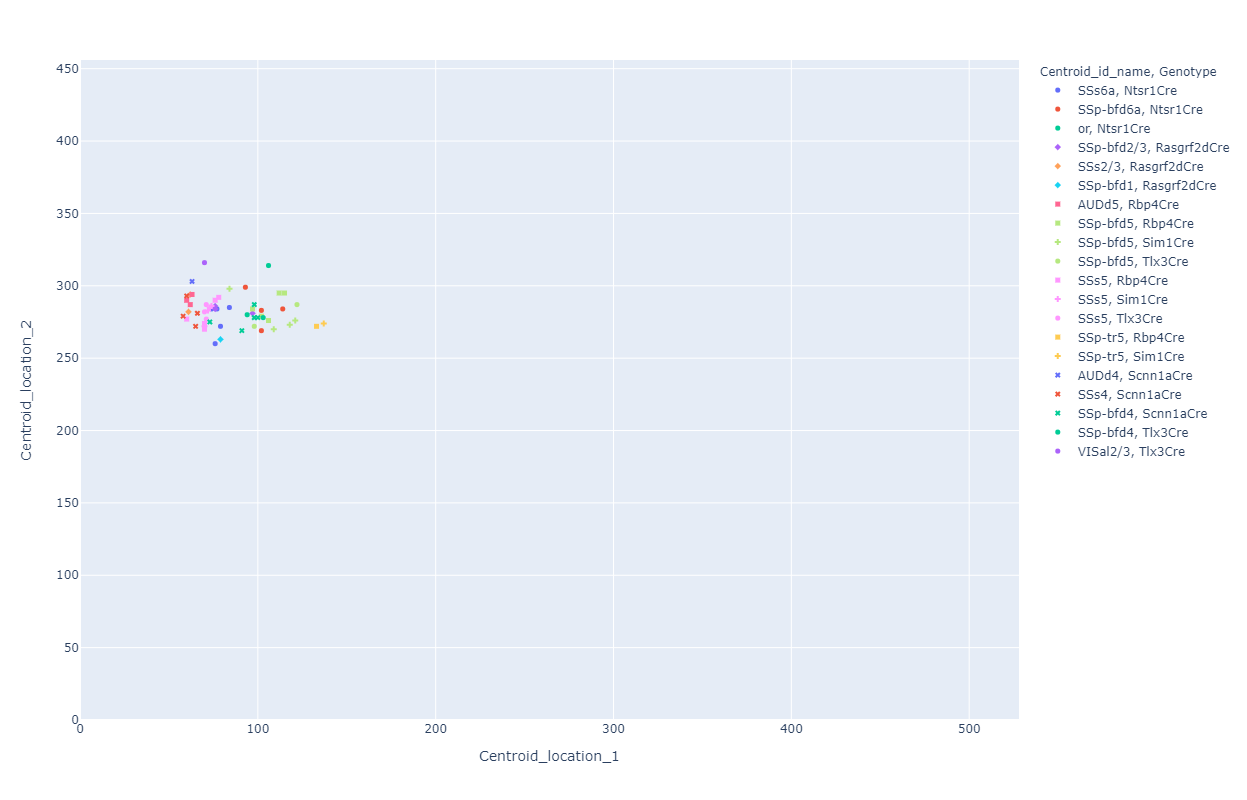

In [12]:
fig = px.scatter(data, x='Centroid_location_1', y='Centroid_location_2', color='Centroid_id_name', symbol='Genotype', 
                 width=800, height=800)
fig.update_traces(marker=dict(size=5))

fig.update_xaxes(range=[0, 528])
fig.update_yaxes(range=[0, 456])
#fig.update_yaxes(range=[0, 456], autorange="reversed")
# autorange reversed makes top left corner 0,0 but does not work with custom range...
fig.show()

fig.write_html("injection_centroid_horizontal.html")
# horizontal view but fliped (in an image, top is 0 but not bottom like in this graph)

In [4]:
# now plot the injection voxel's contribution of region ids


In [13]:
# now plot the injection voxel's contribution of region ids
import ast

def expand_df(datadf):
    data_expanded=pd.DataFrame(data={'sample_id': [],'region_id': [], 'region_name': [], 'count': [], 'percentage': []})
    
    over_eighty=[]
    # set up a list to calculate if contribution from bfd or sss is above 80 percent (combining layers)

    for i in range(0,len(datadf)):

        data_specific=pd.DataFrame(data={'sample_id': [],'region_id': [], 'region_name': [], 'count': [], 'percentage': []})

        test=datadf['Voxel_id'][i]
        testdict=ast.literal_eval(test)[0]
        data_name=datadf['Data_name'][i]

        data_specific['sample_id']= [f'{data_name}']* len(testdict.keys())

        data_specific['region_id']= testdict.keys()
        id_name= [na.give_me_name(i) for i in testdict.keys()]
        data_specific['region_name']= id_name 

        counts=list(testdict.values())
        data_specific['count']= counts
        countsInt = np.array(counts)
        newArray = countsInt*100/sum(countsInt)
        data_specific['percentage']= newArray
        #convert to percentage
        
        data_expanded=data_expanded.append(data_specific)
        
        bfd_percentage= data_specific[data_specific.region_name.str.contains('bfd')].percentage.sum()
        sss_percentage= data_specific[data_specific.region_name.str.contains('SSs')].percentage.sum()
        
        if bfd_percentage> 80:
            include= True
        elif sss_percentage >80:
            include= True
        else:
            include= False
        
        over_eighty.append(include)
                
    return data_expanded, over_eighty


In [14]:
# first separate into genotypes
genotypes=np.unique(data['Genotype'])

this_genotype=genotypes[0]
print(f'this genotype is {this_genotype}')

this_data= data[data['Genotype']== this_genotype]


this genotype is Ntsr1Cre


In [15]:
this_data=this_data.reset_index(drop=True)
this_df,include_list= expand_df(this_data)

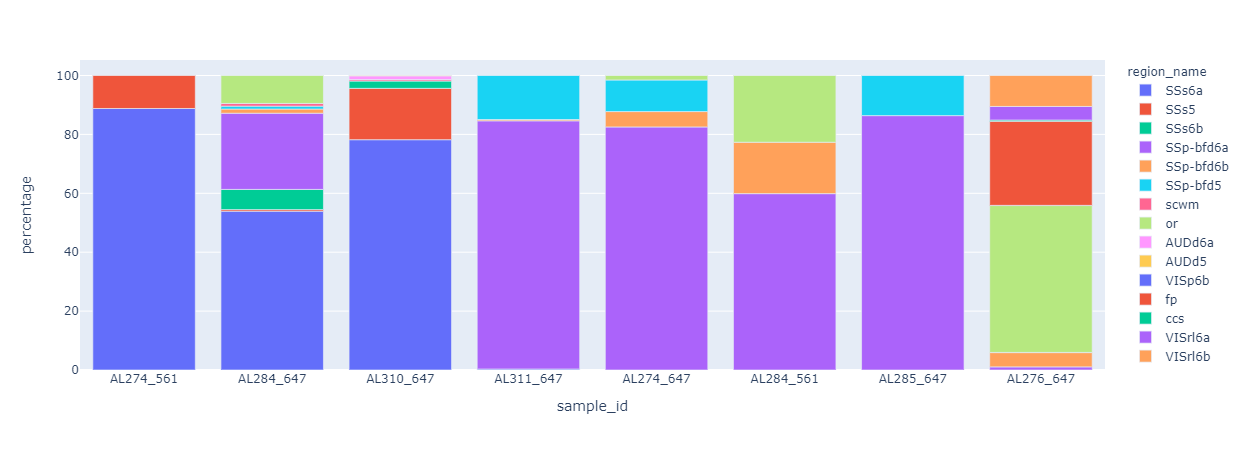

In [73]:
import plotly.express as px


fig = px.bar(this_df, x="sample_id", y="percentage", color="region_name")
fig.show()

fig.write_html(f"{this_genotype}_injectionvoxel_distribution.html")

In [15]:
for i in genotypes:
    print(f'this genotype is {i}')

    this_data= data[data['Genotype']== i]
    
    this_data=this_data.reset_index(drop=True)
    this_df,include_list= expand_df(this_data)
    
    fig = px.bar(this_df, x="sample_id", y="percentage", color="region_name")
    fig.show()

    fig.write_html(f"{i}_injectionvoxel_distribution.html")

this genotype is Ntsr1Cre


this genotype is Rasgrf2dCre


this genotype is Rbp4Cre


this genotype is Scnn1aCre


this genotype is Sim1Cre


this genotype is Tlx3Cre


In [16]:
new_df,over_eighty= expand_df(data)
data['over_eighty']= over_eighty
data.to_excel(r'D:\viral_injectionsite\results_expanded.xlsx')

In [17]:
legit_data=data[data['over_eighty']==True]

In [18]:
legit_data.head()

,Data_name,Total_voxels,Centroid_location_1,Centroid_location_2,Centroid_location_3,Centroid_id,Voxel_id,Genotype,Centroid_id_name,inj_radius,over_eighty
1,AL274_561,2205,77,284,106,862,"[{862: 1958, 1090: 247}]",Ntsr1Cre,SSs6a,201.858327,True
3,AL310_647,1812,74,284,111,862,"[{156: 23, 252: 2, 862: 1417, 893: 45, 1090: 3...",Ntsr1Cre,SSs6a,189.073154,True
4,AL330_647,4020,79,272,109,862,"[{862: 2818, 1038: 681, 1070: 72, 1090: 449}]",Ntsr1Cre,SSs6a,246.595884,True
5,AL274_647,5471,102,283,80,1038,"[{1038: 4515, 1062: 286, 1070: 587, 484682520:...",Ntsr1Cre,SSp-bfd6a,273.274669,True
7,AL285_647,2885,102,269,84,1038,"[{1038: 2492, 1070: 393}]",Ntsr1Cre,SSp-bfd6a,220.779669,True


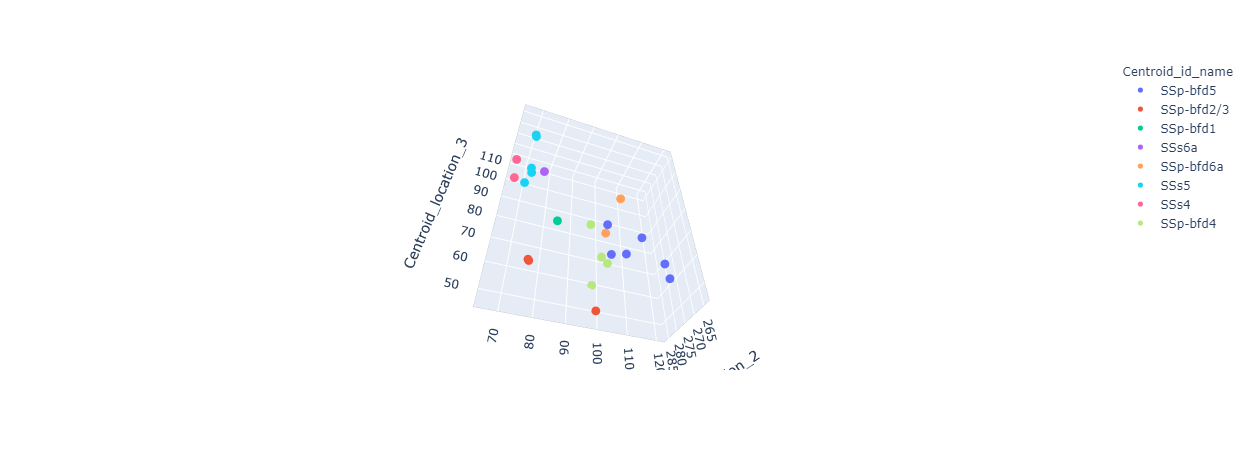

In [71]:
fig = px.scatter_3d(legit_data, x='Centroid_location_1', y='Centroid_location_2', z='Centroid_location_3',
              color='Centroid_id_name')
fig.update_traces(marker=dict(size=5))

fig.update_xaxes(range=[0, 528])
fig.update_yaxes(range=[0, 456])
#fig.update_yaxes(range=[0, 456], autorange="reversed")
# autorange reversed makes top left corner 0,0 but does not work with custom range...
fig.show()

## replot bar graphs for only those qualify injection area above 80% contribution from one region

In [64]:
def expand_df(datadf):
    '''reformat dataframe for plotting stacked bars
    '''
    
    data_expanded=pd.DataFrame(data={'sample_id': [],'genotype': [], 'region_id': [], 'region_name': [], 'count': [], 'percentage': []})

    for i in range(0,len(this_data)):

        data_specific=pd.DataFrame(data={'sample_id': [],'genotype': [], 'region_id': [], 'region_name': [], 'count': [], 'percentage': []})

        test=this_data['Voxel_id'][i]
        testdict=ast.literal_eval(test)[0]
        data_name=this_data['Data_name'][i]
        data_genotype=this_data['Genotype'][i]

        data_specific['sample_id']= [f'{data_name}']* len(testdict.keys())
        data_specific['genotype']= [f'{data_genotype}']* len(testdict.keys())

        data_specific['region_id']= testdict.keys()
        id_name= [na.give_me_name(i) for i in testdict.keys()]
        data_specific['region_name']= id_name 

        counts=list(testdict.values())
        data_specific['count']= counts
        countsInt = np.array(counts)
        newArray = countsInt*100/sum(countsInt)
        data_specific['percentage']= newArray
        #convert to percentage

        data_expanded=data_expanded.append(data_specific)
        
    return data_expanded

In [4]:
data=pd.read_excel(r'D:\viral_injectionsite\results_expanded.xlsx',index_col=0)

In [ ]:
genotype_orders= ['Rasgrf2dCre', 'Scnn1aCre', 'Tlx3Cre', 'Rbp4Cre', 'Sim1Cre', 'Ntsr1Cre']

In [5]:
legit_data=data[data['over_eighty']==True]
legit_data.sort_values('Genotype', inplace=True)

#legit_data

C:\Users\liu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### plot those s1 samples

In [6]:
s1_data= legit_data[legit_data['Centroid_id_name'].str.contains('SSp')]
this_data=s1_data.reset_index(drop=True)
#this_data

In [7]:
this_data=this_data.drop([6])
this_data=this_data.reset_index(drop=True)
# drop AL256 for its noisyness

In [33]:
# basically the expand_df function but without the quantifying 80% part
data_expanded=expand_df(this_data)

In [34]:
df1 =data_expanded.set_index('genotype')
df1= df1.loc[genotype_orders]
# reorder this by genotype!

In [37]:
fig = px.bar(df1, x="sample_id", y="percentage", color="region_name")
#fig.show()
fig.write_image(f"s1_injsites.svg")


In [49]:
df2 =this_data.set_index('Genotype')
df2= df2.loc[genotype_orders]
# reorder this by genotype!

In [55]:
fig = px.box(df2.reset_index(), x="Genotype", y="inj_radius", points="all")
#reset index to put the genotype column back after sorting
fig.write_image("s1_radius.svg")


### plot those s2 samples

In [56]:
s2_data= legit_data[legit_data['Centroid_id_name'].str.contains('SSs')]
this_data=s2_data.reset_index(drop=True)

In [57]:
this_data

,Data_name,Total_voxels,Centroid_location_1,Centroid_location_2,Centroid_location_3,Centroid_id,Voxel_id,Genotype,Centroid_id_name,inj_radius,over_eighty
0,AL274_561,2205,77,284,106,862,"[{862: 1958, 1090: 247}]",Ntsr1Cre,SSs6a,201.858327,True
1,AL310_647,1812,74,284,111,862,"[{156: 23, 252: 2, 862: 1417, 893: 45, 1090: 3...",Ntsr1Cre,SSs6a,189.073154,True
2,AL330_647,4020,79,272,109,862,"[{862: 2818, 1038: 681, 1070: 72, 1090: 449}]",Ntsr1Cre,SSs6a,246.595884,True
3,AL332_561,1143,54,287,77,873,"[{0: 52, 527: 17, 806: 293, 873: 781}]",Rasgrf2dCre,SSs1,162.153334,True
4,AL303_561,3288,62,294,73,806,"[{201: 2, 527: 1, 600: 1, 806: 2222, 873: 804,...",Rasgrf2dCre,SSs2/3,230.615101,True
5,AL333_561,2061,50,277,92,806,"[{0: 22, 806: 1128, 873: 903, 1035: 8}]",Rasgrf2dCre,SSs2/3,197.364847,True
6,AL288_647,4016,70,270,107,1090,"[{862: 499, 1035: 184, 1047: 4, 1070: 238, 109...",Rbp4Cre,SSs5,246.514067,True
7,AL326_647,4784,70,274,101,1090,"[{1035: 336, 1047: 15, 1070: 662, 1090: 3771}]",Rbp4Cre,SSs5,261.320930,True
8,AL327_647,3939,60,277,111,1090,"[{252: 201, 678: 51, 1035: 932, 1090: 2755}]",Rbp4Cre,SSs5,244.928393,True
9,AL290_561,981,65,272,93,1035,"[{201: 5, 806: 104, 1035: 797, 1047: 19, 1090:...",Scnn1aCre,SSs4,154.099114,True


In [65]:
data_expanded=expand_df(this_data)

In [67]:
df1 =data_expanded.set_index('genotype')
df1= df1.loc[genotype_orders]
# reorder this by genotype!

In [69]:
fig = px.bar(df1, x="sample_id", y="percentage", color="region_name")
#fig.show()
fig.write_image("s2_injsites.svg")

In [70]:
df2 =this_data.set_index('Genotype')
df2= df2.loc[genotype_orders]
# reorder this by genotype!

In [71]:
fig = px.box(df2.reset_index(), x="Genotype", y="inj_radius", points="all")
#reset index to put the genotype column back after sorting
fig.write_image("s2_radius.svg")

In [23]:
####### separator

In [22]:
# deprecated
for i in genotypes:
    print(f'this genotype is {i}')

    this_genotype= this_data[this_data['Genotype']== i]
    
    this_genotype=this_genotype.reset_index(drop=True)
    this_df= expand_df(this_genotype)
    
    fig = px.bar(this_df, x="sample_id", y="percentage", color="region_name",
                width=400, height=600)

    fig.write_image(f"{i}_injectionvoxel_distribution.svg")

this genotype is Ntsr1Cre
this genotype is Rasgrf2dCre
this genotype is Rbp4Cre
this genotype is Scnn1aCre
this genotype is Sim1Cre
this genotype is Tlx3Cre
